In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
tf.set_random_seed(777)

/Users/charming/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
if "Display" not in os.environ:
    matplotlib.use('Agg')

/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/charming/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/charming/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", li

In [4]:
import matplotlib.pyplot as plt

In [5]:
def MinMaxScaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    return numerator / ( denominator + 1e-7 )

In [6]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iteration = 500

In [10]:
xy = np.loadtxt('data-02-stock_daily.csv',delimiter=',')
xy = xy[::-1]
len(xy)

732

In [11]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [12]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [13]:
def build_dataset(time_series,seq_length):
    dataX=[]
    dataY=[]
    for i in range(0,len(time_series)-seq_length):
        _x = time_series[i:i+seq_length,:]
        _y = time_series[i+seq_length,[-1]]
        print(_x,'->',_y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [14]:
trainX, trainY = build_dataset(train_set,seq_length)
testX , testY = build_dataset(test_set,seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.07020969 0.06872974 0.048293   0.25920946 0.03312832]] -> [0.03010068]
[[0.12951678 0.13441746 0.15197072 0.20351349 0.13300647]
 [0.11537146 0.11968418 0.14165701 0.07782558 0.13332321]
 [0.12627385 0.12461783 0.13689574 0.12192346 0.11917067]
 [0.11854555 0.12009235 0.13081001 0.1290311  0.11357304]
 [0.09870747 0.09647824 0.09128771 0.18391145 0.07505804]
 [0.07020969 0.06872974 0.048293   0.25920946 0.03312832]
 [0.04260879 0.03834083 0.04328108 0.18437752 0.03010068]] -> [0.03566318]
[[0.11537146 0.11968418 0.14165701 0.07782558 0.13332321]
 [0.12627385 0.12461783 0.13689574 0.12192346 0.11917067]
 [0.11854555 0.12009235 0.13081001 0.1290311  0.11357304]
 [0.09870747 0.09647824 0.09128771 0.18391145 0.07505804]
 [0.07020969 0.06872974 0.048293   0.25920946 0.03312832]
 [0.04260879 0.03834083 0.04328108 0.18437752 0.03010068]
 [0.0115234  0.02553335 0.01231486 0.29986556 0.03566318]] -> [0.01274435]
[[0.12627385 0.12461783 0.13689574 0.12192346 0.11917067]
 [0.11854555 0.120092

 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]] -> [0.50254845]
[[0.46696156 0.47378579 0.48145211 0.13142422 0.49300793]
 [0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]] -> [0.49702118]
[[0.4717227  0.46592576 0.49380279 0.15220938 0.46843445]
 [0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]
 [0.49966831 0.50175537 0.51438369 0.16145021 0.49702118]] -> [0.59225182]
[[0.45088425 0.46642273 0.49323011 0.11621404 0.48814958]
 [0.46151036 0.472390

 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]] -> [0.75352752]
[[0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]
 [0.81490275 0.81241392 0.75552885 0.22351887 0.7322986 ]
 [0.72702913 0.76880942 0.72148401 0.19879    0.78214928]
 [0.6818674  0.71714075 0.70813107 0.32127812 0.71078818]
 [0.71985289 0.72816518 0.73691335 0.20258134 0.73662878]
 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]
 [0.71598881 0.75950332 0.74067241 0.215497   0.75352752]] -> [0.81922061]
[[0.81490275 0.81241392 0.75552885 0.22351887 0.7322986 ]
 [0.72702913 0.76880942 0.72148401 0.19879    0.78214928]
 [0.6818674  0.71714075 0.70813107 0.32127812 0.71078818]
 [0.71985289 0.72816518 0.73691335 0.20258134 0.73662878]
 [0.66917111 0.71751499 0.6647786  0.30806668 0.72487032]
 [0.71598881 0.75950332 0.74067241 0.215497   0.75352752]
 [0.78988962 0.78992269 0.83253592 0.17960921 0.81922061]] -> [0.77141169]
[[0.72702913 0.76880942 0.72148401 0.19879    0.78214928]
 [0.6818674  0.717140

 [0.5043463  0.5776008  0.5495742  0.13511247 0.60187579]] -> [0.54614424]
[[0.61153415 0.59899782 0.63687246 0.0907024  0.6164508 ]
 [0.61417189 0.64662538 0.65256332 0.15967498 0.66794113]
 [0.65343805 0.65092824 0.68406595 0.0573436  0.66955369]
 [0.64498548 0.63689934 0.66819353 0.12752753 0.63950788]
 [0.59408895 0.59501911 0.58386335 0.24217745 0.54596486]
 [0.5043463  0.5776008  0.5495742  0.13511247 0.60187579]
 [0.56039794 0.5536102  0.56047886 0.15076688 0.54614424]] -> [0.56286957]
[[0.61417189 0.64662538 0.65256332 0.15967498 0.66794113]
 [0.65343805 0.65092824 0.68406595 0.0573436  0.66955369]
 [0.64498548 0.63689934 0.66819353 0.12752753 0.63950788]
 [0.59408895 0.59501911 0.58386335 0.24217745 0.54596486]
 [0.5043463  0.5776008  0.5495742  0.13511247 0.60187579]
 [0.56039794 0.5536102  0.56047886 0.15076688 0.54614424]
 [0.53120308 0.56221628 0.58053142 0.09344192 0.56286957]] -> [0.61824274]
[[0.65343805 0.65092824 0.68406595 0.0573436  0.66955369]
 [0.64498548 0.636899

In [15]:
X = tf.placeholder(tf.float32,[None,seq_length,data_dim])
Y = tf.placeholder(tf.float32,[None,1])

In [16]:
cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=hidden_dim,state_is_tuple=True,
                                   activation=tf.tanh)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [18]:
outputs,_states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn=None)


In [20]:
loss = tf.reduce_mean(tf.square(Y_pred - Y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [21]:
targets = tf.placeholder(tf.float32,[None,1])
predictions = tf.placeholder(tf.float32,[None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(iteration):
        _,step_loss = sess.run([train,loss],feed_dict ={X:trainX,Y:trainY})
        print("[step: {}] loss: {}".format(i,step_loss))
        
    test_predict = sess.run(Y_pred,feed_dict={X:testX})
    rmse_val = sess.run(rmse,feed_dict={targets:testY,predictions:test_predict})
    print("RMSE : {}".format(rmse_val))

[step: 0] loss: 0.04881475120782852
[step: 1] loss: 0.012121167965233326
[step: 2] loss: 0.015497400425374508
[step: 3] loss: 0.023523034527897835
[step: 4] loss: 0.018803581595420837
[step: 5] loss: 0.01023284811526537
[step: 6] loss: 0.005231640301644802
[step: 7] loss: 0.005191904492676258
[step: 8] loss: 0.007674607448279858
[step: 9] loss: 0.009612377732992172
[step: 10] loss: 0.009471097029745579
[step: 11] loss: 0.0075469305738806725
[step: 12] loss: 0.005131866782903671
[step: 13] loss: 0.0035449042916297913
[step: 14] loss: 0.003429698757827282
[step: 15] loss: 0.004460780881345272
[step: 16] loss: 0.005630793981254101
[step: 17] loss: 0.0060224225744605064
[step: 18] loss: 0.005435563623905182
[step: 19] loss: 0.004352407995611429
[step: 20] loss: 0.0034427596256136894
[step: 21] loss: 0.003104898612946272
[step: 22] loss: 0.0033084808383136988
[step: 23] loss: 0.003726808587089181
[step: 24] loss: 0.003996252082288265
[step: 25] loss: 0.0039242045022547245
[step: 26] loss: 0

[step: 229] loss: 0.0014465171843767166
[step: 230] loss: 0.001444180030375719
[step: 231] loss: 0.0014418532373383641
[step: 232] loss: 0.0014395368052646518
[step: 233] loss: 0.0014372310834005475
[step: 234] loss: 0.001434934907592833
[step: 235] loss: 0.0014326496748253703
[step: 236] loss: 0.0014303755015134811
[step: 237] loss: 0.0014281115727499127
[step: 238] loss: 0.001425858587026596
[step: 239] loss: 0.0014236164279282093
[step: 240] loss: 0.001421386026777327
[step: 241] loss: 0.0014191666850820184
[step: 242] loss: 0.001416958519257605
[step: 243] loss: 0.0014147614128887653
[step: 244] loss: 0.0014125758316367865
[step: 245] loss: 0.0014104023575782776
[step: 246] loss: 0.001408240059390664
[step: 247] loss: 0.0014060899848118424
[step: 248] loss: 0.0014039515517652035
[step: 249] loss: 0.0014018249930813909
[step: 250] loss: 0.001399710075929761
[step: 251] loss: 0.0013976074988022447
[step: 252] loss: 0.0013955171452835202
[step: 253] loss: 0.0013934391317889094
[step: 

[step: 436] loss: 0.0011901214020326734
[step: 437] loss: 0.0011895764619112015
[step: 438] loss: 0.0011890338500961661
[step: 439] loss: 0.0011884935665875673
[step: 440] loss: 0.0011879553785547614
[step: 441] loss: 0.0011874192859977484
[step: 442] loss: 0.0011868857545778155
[step: 443] loss: 0.0011863538529723883
[step: 444] loss: 0.001185824628919363
[step: 445] loss: 0.001185297966003418
[step: 446] loss: 0.0011847728164866567
[step: 447] loss: 0.0011842501116916537
[step: 448] loss: 0.0011837291531264782
[step: 449] loss: 0.0011832101736217737
[step: 450] loss: 0.0011826938716694713
[step: 451] loss: 0.0011821791995316744
[step: 452] loss: 0.001181666855700314
[step: 453] loss: 0.0011811562580987811
[step: 454] loss: 0.001180647755973041
[step: 455] loss: 0.0011801407672464848
[step: 456] loss: 0.0011796365724876523
[step: 457] loss: 0.001179134240373969
[step: 458] loss: 0.0011786333052441478
[step: 459] loss: 0.0011781343491747975
[step: 460] loss: 0.0011776377214118838
[step

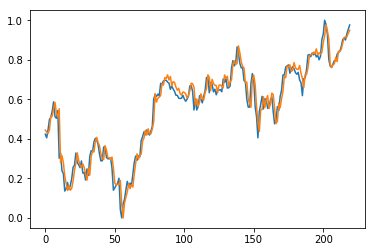

In [29]:
plt.plot(testY)
plt.plot(test_predict)
plt.show()

In [40]:
trainX

array([[[2.53065030e-01, 2.45070970e-01, 2.33983036e-01, 4.66075110e-04,
         2.32039560e-01],
        [2.29604366e-01, 2.39728936e-01, 2.54567513e-01, 2.98467330e-03,
         2.37426028e-01],
        [2.49235510e-01, 2.41668371e-01, 2.48338489e-01, 2.59926504e-04,
         2.26793794e-01],
        ...,
        [3.63433786e-01, 3.70389871e-01, 2.67168847e-01, 1.24764722e-02,
         2.62105010e-01],
        [2.59447633e-01, 3.10673724e-01, 2.74113889e-01, 4.56323384e-01,
         2.71751265e-01],
        [2.76008150e-01, 2.78314566e-01, 1.98470380e-01, 5.70171193e-01,
         1.78104644e-01]],

       [[2.29604366e-01, 2.39728936e-01, 2.54567513e-01, 2.98467330e-03,
         2.37426028e-01],
        [2.49235510e-01, 2.41668371e-01, 2.48338489e-01, 2.59926504e-04,
         2.26793794e-01],
        [2.21013495e-01, 2.46602231e-01, 2.54710584e-01, 0.00000000e+00,
         2.62668239e-01],
        ...,
        [2.59447633e-01, 3.10673724e-01, 2.74113889e-01, 4.56323384e-01,
        

In [42]:
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
hy = trainX * W + b

In [47]:
cost = tf.reduce_mean(tf.square(hy - Y))

In [48]:
train2 = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [49]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        _,cost_val,W_val,b_val = sess.run([train2,cost,W,b])
        
        if step % 20 == 0:
            print(step,cost_val,W_val,b_val)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,1]
	 [[node Placeholder_1 (defined at <ipython-input-15-2a53e4062813>:2)  = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "/Users/charming/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/charming/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-2a53e4062813>", line 2, in <module>
    Y = tf.placeholder(tf.float32,[None,1])
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/Users/charming/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype float and shape [?,1]
	 [[node Placeholder_1 (defined at <ipython-input-15-2a53e4062813>:2)  = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
